### Exercício 22. Interpretando Valores Discrepantes
#### Consulte o conjunto de dados 21 no apêndice B, referente às resistências axiais de latas de alumínio de 0,0111 in de espessura. A resistência de 504 lb é um valor discrepante. (https://www.triolastats.com/es14-data-sets)
#### Construa um histograma que inclua o valor de 504 lb e, a seguir, construa outro histograma sem o valor de 504 lb. Em ambos os casos , inicie a primeira classe em 200 lb e use uma amplitude de classe de 20 lb.

In [6]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# versão bibliotecas
print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Matplotlib: {matplotlib.__version__}')

Versão Pandas: 2.2.3
Versão Matplotlib: 3.10.0


In [8]:
# valores do exercício com 504
valores1 = [287, 216, 260, 291, 210, 272, 260, 294, 253, 292, 280, 262, 295, 230, 283, 255, 295, 271, 268, 225, 246, 297, 302, 282, 310, 305, 306, 262, 222, 276, 270, 280, 288, 296, 281, 300, 290, 284, 304, 291, 277, 317, 292, 215, 287, 280, 311, 283, 293, 285, 276, 301, 285, 277, 270, 275, 290, 288, 287, 282, 275, 279, 300, 293, 290, 313, 299, 300, 265, 285, 294, 262, 297, 272, 284, 291, 306, 263, 304, 288, 256, 290, 284, 307, 273, 283, 250, 244, 231, 266, 504, 284, 227, 269, 282, 292, 286, 281, 296, 287, 285, 281, 298, 289, 283, 247, 279, 276, 288, 284, 301, 309, 284, 284, 286, 303, 308, 288, 303, 306, 285, 289, 292, 295, 283, 315, 290, 247, 268, 283, 305, 279, 287, 285, 298, 279, 274, 205, 302, 296, 282, 300, 284, 281, 279, 255, 210, 279, 286, 293, 285, 288, 289, 281, 297, 314, 295, 257, 298, 211, 275, 247, 279, 303, 286, 287, 287, 275, 243, 274, 299, 291, 281, 303, 269, ]

# valores do exercício sem 504
valores2 = [287, 216, 260, 291, 210, 272, 260, 294, 253, 292, 280, 262, 295, 230, 283, 255, 295, 271, 268, 225, 246, 297, 302, 282, 310, 305, 306, 262, 222, 276, 270, 280, 288, 296, 281, 300, 290, 284, 304, 291, 277, 317, 292, 215, 287, 280, 311, 283, 293, 285, 276, 301, 285, 277, 270, 275, 290, 288, 287, 282, 275, 279, 300, 293, 290, 313, 299, 300, 265, 285, 294, 262, 297, 272, 284, 291, 306, 263, 304, 288, 256, 290, 284, 307, 273, 283, 250, 244, 231, 266, 284, 227, 269, 282, 292, 286, 281, 296, 287, 285, 281, 298, 289, 283, 247, 279, 276, 288, 284, 301, 309, 284, 284, 286, 303, 308, 288, 303, 306, 285, 289, 292, 295, 283, 315, 290, 247, 268, 283, 305, 279, 287, 285, 298, 279, 274, 205, 302, 296, 282, 300, 284, 281, 279, 255, 210, 279, 286, 293, 285, 288, 289, 281, 297, 314, 295, 257, 298, 211, 275, 247, 279, 303, 286, 287, 287, 275, 243, 274, 299, 291, 281, 303, 269, ]

In [10]:
# valores ordenados com 504
ordenados1 = pd.Series(valores1).sort_values()

# valores ordenados sem 504
ordenados2 = pd.Series(valores2).sort_values()

In [12]:
ordenados2

136    205
4      210
145    210
158    211
43     215
      ... 
46     311
65     313
154    314
124    315
41     317
Length: 174, dtype: int64

In [14]:
# dicionário de classes
classes_com = {
'Cargas Axiais (com outlier)' : ['200 - 219', '220 - 239', '240 - 259', '260 - 279', '280 - 299', '300 - 319', '320 - 339', '340 - 359',
'360 - 379', '380 - 399', '400 - 419', '420 - 439', '440 - 459', '460 - 479', '480 - 499', '500 - 519']
              }

classes_sem = {
'Cargas Axiais (sem outlier)' : ['200 - 219', '220 - 239', '240 - 259', '260 - 279', '280 - 299', '300 - 319']
              }

In [15]:
# definir bins (caixas de valores)
bins_com = [200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520]
bins_sem = [200, 220, 240, 260, 280, 300, 320]

# categorizar valores em classes
cat_com = pd.cut(x = ordenados1, bins = bins_com, labels = classes_com['Cargas Axiais (com outlier)'], include_lowest = True, right = False)
cat_sem = pd.cut(x = ordenados2, bins = bins_sem, labels = classes_sem['Cargas Axiais (sem outlier)'], include_lowest = True, right = False)

In [19]:
# Distribuição de Frequências - Cargas Axiais (com outlier)

## gerar frequência de classes
freq1 = cat_com.value_counts().sort_index()

## gerar distribuição de frequências completa

axiais_com_outlier = pd.DataFrame(classes_com)
axiais_com_outlier['Frequência'] = freq1.tolist()
axiais_com_outlier['Frequência Relativa'] = ((axiais_com_outlier['Frequência'] / axiais_com_outlier['Frequência'].sum())*100).round(2)
axiais_com_outlier['Frequência Acumulada'] = axiais_com_outlier['Frequência'].cumsum()
axiais_com_outlier

,Cargas Axiais (com outlier),Frequência,Frequência Relativa,Frequência Acumulada
0,200 - 219,6,3.43,6
1,220 - 239,5,2.86,11
2,240 - 259,12,6.86,23
3,260 - 279,36,20.57,59
4,280 - 299,87,49.71,146
5,300 - 319,28,16.00,174
6,320 - 339,0,0.00,174
7,340 - 359,0,0.00,174
8,360 - 379,0,0.00,174
9,380 - 399,0,0.00,174


In [21]:
# Distribuição de Frequências - Cargas Axiais (sem outlier)

## gerar frequência de classes
freq2 = cat_sem.value_counts().sort_index()

## gerar distribuição de frequências completa
axiais_sem_outlier = pd.DataFrame(classes_sem)
axiais_sem_outlier['Frequência'] = freq2.tolist()
axiais_sem_outlier['Frequência Relativa'] = ((axiais_sem_outlier['Frequência'] / axiais_sem_outlier['Frequência'].sum())*100).round(2)
axiais_sem_outlier['Frequência Acumulada'] = axiais_sem_outlier['Frequência'].cumsum()
axiais_sem_outlier

,Cargas Axiais (sem outlier),Frequência,Frequência Relativa,Frequência Acumulada
0,200 - 219,6,3.45,6
1,220 - 239,5,2.87,11
2,240 - 259,12,6.90,23
3,260 - 279,36,20.69,59
4,280 - 299,87,50.00,146
5,300 - 319,28,16.09,174


In [34]:
# gerar fronteiras de classe - Cargas Axiais (com outlier)
front1 = float(input("Qual a primeira fronteira de classe?"))
ampltd = float(input("Qual a amplitude de classe?"))
front2 = float(input("Qual a última fronteira de classe?"))

ff = []
while front1 <= front2:
    ff.append(round(front1, 5))
    front1+=ampltd
ff

Qual a primeira fronteira de classe? 219.9
Qual a amplitude de classe? 20
Qual a última fronteira de classe? 519.9


[219.9,
 239.9,
 259.9,
 279.9,
 299.9,
 319.9,
 339.9,
 359.9,
 379.9,
 399.9,
 419.9,
 439.9,
 459.9,
 479.9,
 499.9,
 519.9]

In [35]:
# gerar fronteiras de classe - Cargas Axiais (sem outlier)
front1 = float(input("Qual a primeira fronteira de classe?"))
ampltd = float(input("Qual a amplitude de classe?"))
front2 = float(input("Qual a última fronteira de classe?"))

ff2 = []
while front1 <= front2:
    ff2.append(round(front1, 5))
    front1+=ampltd
ff2

Qual a primeira fronteira de classe? 219.9
Qual a amplitude de classe? 20
Qual a última fronteira de classe? 319.9


[219.9, 239.9, 259.9, 279.9, 299.9, 319.9]

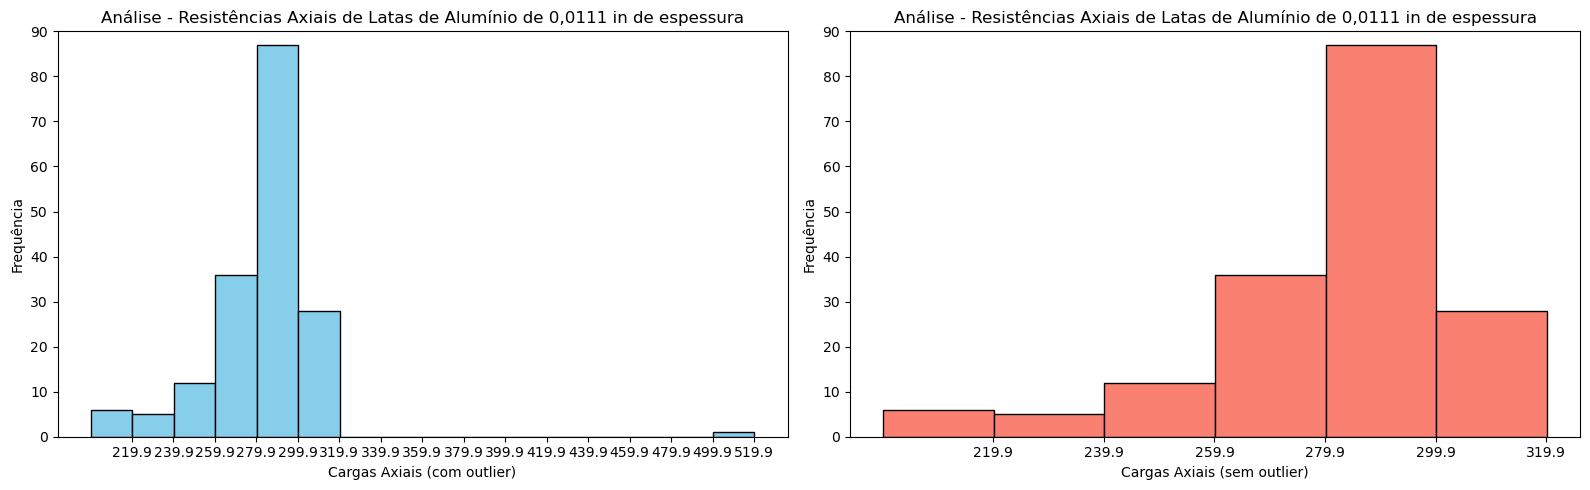

In [36]:
# plotando histogramas
# Cria uma figura e 2 eixos (subplots) em 1 linha e 2 colunas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# --- Plotando o primeiro histograma (no eixo da esquerda) ---
axs[0].hist(x = valores1, bins= bins_com, color='skyblue', edgecolor='black')
axs[0].set_title('Análise - Resistências Axiais de Latas de Alumínio de 0,0111 in de espessura')
axs[0].set_xlabel('Cargas Axiais (com outlier)')
axs[0].set_ylabel('Frequência')
axs[0].set_ylim([0, 90]) # Define o mesmo limite X para facilitar comparação
axs[0].set_xticks(ff)

# --- Plotando o segundo histograma (no eixo da direita) ---
axs[1].hist(x = valores2, bins= bins_sem, color='salmon', edgecolor='black')
axs[1].set_title('Análise - Resistências Axiais de Latas de Alumínio de 0,0111 in de espessura')
axs[1].set_xlabel('Cargas Axiais (sem outlier)')
axs[1].set_ylabel('Frequência')
axs[1].set_ylim([0, 90]) # Define o mesmo limite X
axs[1].set_xticks(ff2)

plt.tight_layout() # Ajusta o layout automaticamente
plt.show()

### Estabeleça uma generalização sobre o efeito que um valor discrepante pode ter sobre um histograma

Fazendo uma comparação entre os gráficos, vemos que um valor discrepante (outlier) pode gerar uma distorção na visualização dos dados e uma assimetria na distribuição deles, o mesmo se repete para as métricas estatísticas.